# Sunspot Dataset

The main goal of this Notebook is given Sunspot Dataset try to compare two different model for predicting time series: 
 
 - SARIMA/ARIMA model 
 - TADA model 

Prediction one step forward 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error

## Load the Data 

In [2]:
pwd

'/Users/nicolaronzoni/Desktop/UCA/case_study/TADA'

In [3]:
series= pd.read_csv("Sunspots.csv",header=0, index_col=1)

In [4]:
series

,Unnamed: 0,Monthly Mean Total Sunspot Number
Date,,
1749-01-31,0,96.7
1749-02-28,1,104.3
1749-03-31,2,116.7
1749-04-30,3,92.8
1749-05-31,4,141.7
...,...,...
2019-08-31,3247,0.5
2019-09-30,3248,1.1
2019-10-31,3249,0.4


Delete the index column such that the new index column will be the date of the observation.

In [5]:
series=series.drop(columns=['Unnamed: 0'],axis=1)

In [6]:
series

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7
...,...
2019-08-31,0.5
2019-09-30,1.1
2019-10-31,0.4


## Descriptive Analysis  

<Figure size 1080x720 with 0 Axes>

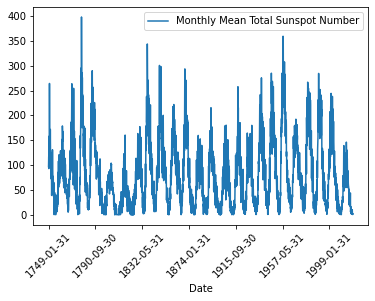

In [7]:
plt.figure(figsize=(15,10))
series.plot()
plt.xticks(rotation=45)
plt.show()

The dataset shows seasonality with large differences between seasons.

In [8]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [9]:
X=series.values

In [10]:
X

array([[ 96.7],
       [104.3],
       [116.7],
       ...,
       [  0.4],
       [  0.5],
       [  1.6]])

Global and partial autocorrelation 

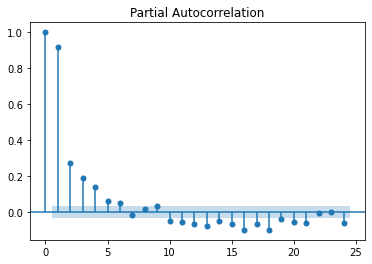

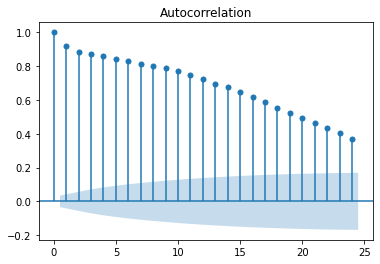

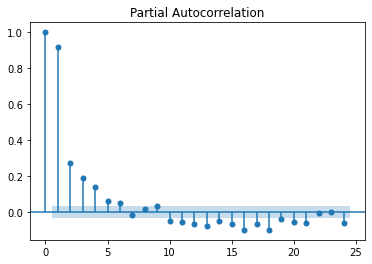

In [11]:
plot_acf(X, lags=24)
plot_pacf(X,lags=24)

 plot of First order difference

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(-500.0, 0, '1978-05-31'),
  Text(0.0, 0, '1749-01-31'),
  Text(500.0, 0, '1790-09-30'),
  Text(1000.0, 0, '1832-05-31'),
  Text(1500.0, 0, '1874-01-31'),
  Text(2000.0, 0, '1915-09-30'),
  Text(2500.0, 0, '1957-05-31'),
  Text(3000.0, 0, '1999-01-31'),
  Text(3500.0, 0, '')])

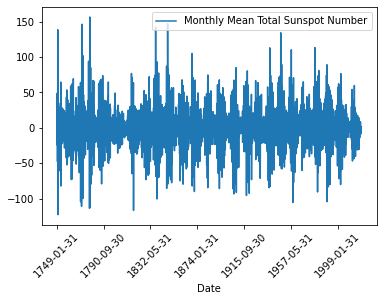

In [12]:
series.diff(1).plot()
plt.xticks(rotation=45)

plot of seasonal difference 

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(-500.0, 0, '1978-05-31'),
  Text(0.0, 0, '1749-01-31'),
  Text(500.0, 0, '1790-09-30'),
  Text(1000.0, 0, '1832-05-31'),
  Text(1500.0, 0, '1874-01-31'),
  Text(2000.0, 0, '1915-09-30'),
  Text(2500.0, 0, '1957-05-31'),
  Text(3000.0, 0, '1999-01-31'),
  Text(3500.0, 0, '')])

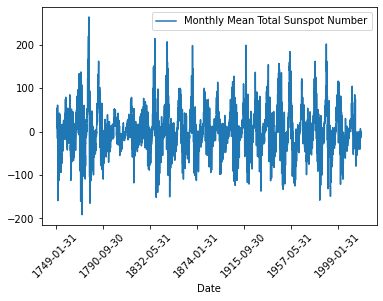

In [13]:
series.diff(12).plot()
plt.xticks(rotation=45)

# Pre-process for TADA 

In [14]:

# grid search persistence models
from math import sqrt
from numpy import mean
from pandas import read_csv
from sklearn.metrics import mean_squared_error


#The train_test_split() function below will split the series
#taking the raw observations and the number of observations to use in the test set as arguments.

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]


#First, the dataset is split into train and test sets. 
#We will call the train_test_split() function
#to perform this split and pass in the pre-specified number of observations to use as the test data.

#A model will be fit once on the training dataset for a given configuration.

# fit a model
def model_fit(train, config):
    return None

#Each time step of the test dataset is enumerated.
#A prediction is made using the fit model.
#Again, we will define a generic function named model_predict()
#that takes the fit model, the history, and the model configuration 
#and makes a single one-step prediction. 

# forecast with a pre-fit model
def model_predict(model, history, offset):
    return history[-offset]

#We will calculate the root mean squared error, or RMSE,
#between predictions and the true values.
# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

#The prediction is added to a list of predictions
#and the true observation from the test set is added to a list of observations that was seeded with all observations from the training dataset. This list is built up during each step in the walk-forward validation, allowing the model to make a one-step prediction using the most recent history.

#All of the predictions can then be compared to the true values in the test set
#and an error measure calculated.

#We will calculate the root mean squared error, or RMSE, between predictions and the true values.

 
# walk-forward validation for univariate data
#takes the dataset, the number of observations to use as the test set, and the configuration for the model, 
#and returns the RMSE for the model performance on the test set.
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # fit model
    model = model_fit(train, cfg)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = model_predict(model, history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    print(' > %.3f' % error)
    return error
 
#Repeat evaluation: 
#Genetic Algorithm are adaptive
#Given the same model configuration and the same training dataset, 
#a different set of weights will result each time, this mean that we could have different performance. 

#This is a benefit because the model find high performing configurations to complex problem 
#However it is also a problem when evaluating the performance of a model and choosing a final model to predict. 

#To address model evaluation, 
#we will evaluate a model configuration multiple times via walk-forward validation
#and report the error as the average error across each evaluation.
#but indeed this is not always possible especially when we deal with computational intense algorithms where a lot of weights must be set. 

#The repeat_evaluate() function below implements this
#and allows the number of repeats to be specified as an optional parameter
#that defaults to 1 and returns the mean RMSE score from all repeats.

# score a model, return None on failure
def repeat_evaluate(data, config, n_test, n_repeats=1):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
    # summarize score
    result = mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)


#All that is left is a function to drive the search.
#We can define a grid_search() function that takes
#the dataset, a list of configurations to search, and the number of observations to use as the test set 
#and perform the search.
 
# grid search configs
def grid_search(data, cfg_list, n_test):
    # evaluate configs
    scores = [repeat_evaluate(data, cfg, n_test) for cfg in cfg_list]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores




After having create the function, we apply it to our data. We decide to split the train and test set considering as a test just the last observation.
We take into account the best 6 models. 

In [15]:
# define dataset

data = X
# data split
n_test = 12
# model configs
cfg_list = [1,2,3,4,5,6,7,8,9,10,11,12]
# grid search
scores = grid_search(data, cfg_list, n_test)
print('done')
# list top 10 configs
for cfg, error in scores[:6]:
    print(cfg, error)

 > 4.296
> Model[1] 4.296
 > 4.387
> Model[2] 4.387
 > 5.571
> Model[3] 5.571
 > 5.189
> Model[4] 5.189
 > 5.538
> Model[5] 5.538
 > 6.208
> Model[6] 6.208
 > 5.891
> Model[7] 5.891
 > 6.882
> Model[8] 6.882
 > 5.823
> Model[9] 5.823
 > 5.576
> Model[10] 5.576
 > 4.165
> Model[11] 4.165
 > 6.315
> Model[12] 6.315
done
11 4.164632836957739
1 4.296025294773453
2 4.386627406105971
4 5.188769924879434
5 5.53835113850082
3 5.571205734249395


Best 6 previous steps to predict one step forward are showed above. The best ones are selected by computing the RMSE in the walk forward validation process.   

# tsExtract: Time Series Preprocessing Library

In [16]:
from tsextract.feature_extraction.extract import build_features
from tsextract.domain.statistics import median, mean, skew, kurtosis, std
from tsextract.domain.temporal import abs_energy

features_request = {
    "window":[11], # Xt-1, Xt-2, Xt-3, Xt-4,Xt-5,Xt-6,....,Xt-11  features for Xt+1 (Select then the best ones based on the grid search)
    #for the below features, we create it just to explore the feature creation tools of tsextract.
    "window_statistic":[12, std], #standard deviation of(Xt-1,Xt-2,Xt-3,....,Xt-12) feature for Xt+1 --> Seasonality 
    "window_statistic":[12,median],#median of (Xt-1,Xt-2,Xt-3,....,Xt-12) feature for Xt+1
    "difference":[13,12], #(Xt-Xt-12) features for Xt ---> Stationarity
    "difference_statistic":[3,1, abs_energy], #(Xt-Xt-1)^2+(Xt-1-Xt-2)^2 feature for Xt+1 
}

features = build_features(series['Monthly Mean Total Sunspot Number'], features_request, include_tzero=True, target_lag=1)
# our goal is to predict one step forward target_lag=1. 

In [17]:
features

,T-11,T-10,T-9,T-8,T-7,T-6,T-5,T-4,T-3,T-2,T-1,window_statistic_12_median,difference_13_12-1,difference_statistic_3_1_abs_energy,tzero,Target_Tplus1
Date,,,,,,,,,,,,,,,,
1750-01-31,104.3,116.7,92.8,141.7,139.2,158.0,110.5,126.5,125.8,264.3,142.0,126.15,25.5,15349.33,122.2,126.5
1750-02-28,116.7,92.8,141.7,139.2,158.0,110.5,126.5,125.8,264.3,142.0,122.2,126.15,22.2,410.53,126.5,148.7
1750-03-31,92.8,141.7,139.2,158.0,110.5,126.5,125.8,264.3,142.0,122.2,126.5,126.50,32.0,511.33,148.7,147.2
1750-04-30,141.7,139.2,158.0,110.5,126.5,125.8,264.3,142.0,122.2,126.5,148.7,132.85,54.4,495.09,147.2,150.0
1750-05-31,139.2,158.0,110.5,126.5,125.8,264.3,142.0,122.2,126.5,148.7,147.2,140.45,8.3,10.09,150.0,166.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31,8.7,3.3,4.9,4.9,3.1,7.7,0.8,9.4,9.1,9.9,1.2,4.90,-0.7,75.78,0.9,0.5
2019-08-31,3.3,4.9,4.9,3.1,7.7,0.8,9.4,9.1,9.9,1.2,0.9,4.90,-8.2,0.25,0.5,1.1
2019-09-30,4.9,4.9,3.1,7.7,0.8,9.4,9.1,9.9,1.2,0.9,0.5,4.10,-2.2,0.52,1.1,0.4


Save the csv dataset in order to use it on TADA

In [18]:
features.to_csv(r'/Users/nicolaronzoni/Desktop/UCA/case_study/TADA/SunspotFeature.csv', index = True, header=True)

## TADA prediction 

In [19]:
import math
import pandas as pd

abs = math.fabs
ceiling = math.ceil
cos = math.cos
exp = math.exp
floor = math.floor
log = math.log
sin = math.sin
sqrt = math.sqrt
truncate = math.trunc

variables = ["T-8", "T-1", "difference_13_12-1", "T-3", "tzero"]


def check_sample(sample: pd.Series):
    for variable in variables:
        if variable not in sample.index:
            raise Exception("Variable error: {} not present in input".format(variable))


def predict(sample: pd.Series, preprocessed: bool) -> float:
    check_sample(sample)

    column_0 = float(sample["T-8"])
    column_1 = float(sample["T-1"])
    column_2 = float(sample["difference_13_12-1"])
    column_9 = float(sample["T-3"])
    tzero = float(sample["tzero"])

    return 0.47476271787264*column_2 - 0.000415032554341747*column_1*column_2 - 0.000563072971002988*column_2*sin(column_1) + 0.000415032554341747*column_2**2 + 0.539072034507153*sqrt(abs(column_2)) + 0.175329742395713*floor(tzero) - 0.597537031854734*floor(-0.419058940932557*column_0 + 0.167055771725032*ceiling(column_0)) + 0.212273446118005*floor(0.424322880903334*(column_1 - column_2) + 0.575677119096666*sin(column_1)) + 0.328734447642834*floor(0.495765621423667*(-column_2 + column_9) + 0.504234378576333*sin(column_9)) + 0.195193830509612*ceiling(0.424322880903334*(column_1 - column_2) + 0.575677119096666*sin(column_1)) - 0.00630517428416182*sin(column_2) - 1.02848918508668*cos(0.419058940932557*column_0 - 0.167055771725032*ceiling(column_0)) + 0.285274549591101*abs(tzero) + 0.00370304986928891*abs(0.495765621423667*(-column_2 + column_9) + 0.504234378576333*sin(column_9))

# Association table between variable and column names:
# "column_0" = "T-8"
# "column_1" = "T-1"
# "column_2" = "difference_13_12-1"
# "column_9" = "T-3"

## Prediction with SARIMA/ARIMA 

We implement a SARIMA/ARIMA search grid in order to compute the prediction and compare it with our result on TADA. 

In [20]:
#grid search for SARIMA model

# grid search sarima hyperparameters

from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX


#The function takes an array of observations and a list of configuration parameters used to configure the model:
#specifically two tuples and a string for the trend order, seasonal order trend, and parameter.
# one-step sarima forecast
def sarima_forecast(history, config):
    order, sorder, trend = config
    # define model
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]

#we need to build up some functions for fitting and evaluating a model repeatedly via walk-forward validation,
#including splitting a dataset into train and test sets and evaluating one-step forecasts.

#We can split an array of data using a slice given a specified size of the split.
#for the size of the split we use the number of time steps to use in the test set.
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

#After forecasts have been made for each step in the test dataset,
#they need to be compared to the test set in order to calculate an error score.

#To evaluate one-step forescast we use RMSE. 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))


#We can now implement the walk-forward validation scheme.
#This is a standard approach to evaluating a time series forecasting 
#The function sarima_forecast() has the opportunity to make good forecasts at each time step, as new data become available.

#First, a provided univariate time series dataset is split into train and test sets using the train_test_split() function.
#Second, the number of observations in the test set are enumerated. 
#For each we fit a model on all of the history and make a one step forecast. 
#Third, The true observation for the time step is then added to the history and the process is repeated. 
#The sarima_forecast() function is called in order to fit a model and make a prediction. 
#Fourth, an error score is calculated by comparing all one-step forecasts to the actual test set by calling the measure_rmse() function.


#The walk_forward_validation() takes: a univariate time series, a number of time steps to use in the test set, and an array of model configuration. 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = sarima_forecast(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    return error


#Possible problems 
#One possible issue is that some combinations of model configurations may not be called for the model and will throw an exception
#Ex. specifying some but not all aspects of the seasonal structure in the data.

#Further, some models may also raise warnings on some data
#Ex. from the linear algebra libraries called by the statsmodels library.
#solutions:
#We can trap exceptions and ignore warnings during the grid search by wrapping all calls to walk_forward_validation() with a try-except and a block to ignore warnings. 
#We can also add debugging support to disable these protections in the case we want to see what is really going on. 
#Finally,  we can return some information about the skill of each model evaluated. This is helpful when a large number of models are evaluated.

#The score_model() function below implements this and returns a tuple of (key and result), where the key is a string version of the tested model configuration.
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
    result = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
        # one failure during model validation suggests an unstable config
        try:
            # never show warnings when grid searching, too noisy
            with catch_warnings():
                filterwarnings("ignore")
                result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
    # check for an interesting result
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    return (key, result)


#Now we  need a loop to test a list of different model configurations.
#This is the main function that drives the grid search process, we will call the score_model() function for each model configuration.
#The grid_search() function below implements this behavior given:
#a univariate time series dataset
#a list of model configurations (list of lists)
#the number of time steps to use in the test set.
#An optional parallel argument that allows us to speed up the process of the evaluation of the  models 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
    scores = None
    scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
    # remove empty results
    scores = [r for r in scores if r[1] != None]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores

#The only thing left to do is to define a list of model configurations to try for a dataset.
#We can define this generically.
#The only parameter we may want to specify is the periodicity of the seasonal component in the series, if one exists. 
#By default, we will assume no seasonal component but of course it depends on the time series that we are analyzing 
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
    models = list()
    # define config lists
    #autoregressive parameter for modeling the trend 
    p_params = [0, 1, 2]
    #integrated parameter for modeling the trend 
    d_params = [0, 1]
    #moving average for modeling the trend
    q_params = [0, 1, 2]
    #parameters for deterministic trend 
    #no trend, constant trend, linear trend
    t_params = ['n','c','t']
    #autoregressive parameter for modeling the seasonality
    P_params = [0, 1]
    #integrated parameter for modeling the seasonality
    D_params = [0, 1]
    #moving average for modeling the seasonality
    Q_params = [0, 1]
    #seasonal component defined by the user 
    m_params = seasonal
    # create config instances
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    models.append(cfg)
    return models
 

#We now have a framework for grid searching SARIMA model hyperparameters via one-step walk-forward validation.



For time computing reason we set seasonal parameter equal to 0, so at the end we will have a ARIMA model to compare our TADA result. 

As we previously did we perform the search grid considering as test only the last observation.

In [21]:
if __name__ == '__main__':
    # define dataset
    data = X

    # data split
    n_test = 12
    # model configs
    #manually state the parameter for the seasonality that we would like to try.
    cfg_list = sarima_configs(seasonal=[0])
    # grid search
    scores = grid_search(data, cfg_list, n_test)
    print('done')
    # list top 3 configs
    for cfg, error in scores[:3]:
        print(cfg, error)

 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 5.290
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'c']] 78.732
 > Model[[(0, 0, 0), (0, 0, 0, 0), 't']] 122.644
 > Model[[(0, 0, 1), (0, 0, 0, 0), 'n']] 5.151
 > Model[[(0, 0, 1), (0, 0, 0, 0), 'c']] 46.173
 > Model[[(0, 0, 1), (0, 0, 0, 0), 't']] 70.586
 > Model[[(0, 0, 2), (0, 0, 0, 0), 'n']] 5.309
 > Model[[(0, 0, 2), (0, 0, 0, 0), 'c']] 32.489
 > Model[[(0, 0, 2), (0, 0, 0, 0), 't']] 48.488
 > Model[[(0, 1, 0), (0, 0, 0, 0), 'n']] 4.296
 > Model[[(0, 1, 0), (0, 0, 0, 0), 'c']] 4.296
 > Model[[(0, 1, 0), (0, 0, 0, 0), 't']] 4.296
 > Model[[(0, 1, 1), (0, 0, 0, 0), 'n']] 3.782
 > Model[[(0, 1, 1), (0, 0, 0, 0), 'c']] 3.776
 > Model[[(0, 1, 1), (0, 0, 0, 0), 't']] 3.766
 > Model[[(0, 1, 2), (0, 0, 0, 0), 'n']] 3.817
 > Model[[(0, 1, 2), (0, 0, 0, 0), 'c']] 3.807
 > Model[[(0, 1, 2), (0, 0, 0, 0), 't']] 3.796
 > Model[[(1, 0, 0), (0, 0, 0, 0), 'n']] 4.225
 > Model[[(1, 0, 0), (0, 0, 0, 0), 'c']] 7.741
 > Model[[(1, 0, 0), (0, 0, 0, 0), 't']] 8.746
 > Mod

## Comparison TADA VS ARIMA 

predicted ARIMA=4.078359, expected=7.700000
predicted ARIMA=6.475372, expected=0.800000
predicted ARIMA=2.668829, expected=9.400000
predicted ARIMA=7.340436, expected=9.100000
predicted ARIMA=7.508380, expected=9.900000
predicted ARIMA=8.649683, expected=1.200000
predicted ARIMA=4.022500, expected=0.900000
predicted ARIMA=3.194960, expected=0.500000
predicted ARIMA=2.033626, expected=1.100000
predicted ARIMA=1.777201, expected=0.400000
predicted ARIMA=1.053342, expected=0.500000
predicted ARIMA=0.884006, expected=1.600000
Test RMSE ARIMA: 3.825
predicted TADA=5.386005, expected=7.700000
predicted TADA=8.304866, expected=0.800000
predicted TADA=5.913280, expected=9.400000
predicted TADA=6.911383, expected=9.100000
predicted TADA=9.605055, expected=9.900000
predicted TADA=6.583201, expected=1.200000
predicted TADA=4.643816, expected=0.900000
predicted TADA=3.485148, expected=0.500000
predicted TADA=2.088092, expected=1.100000
predicted TADA=3.038621, expected=0.400000
predicted TADA=0.71

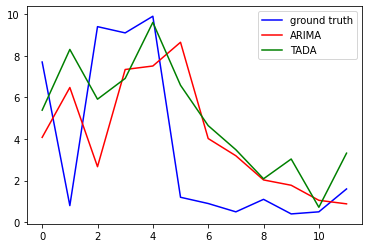

In [22]:
predictions_ARIMA = list()
# define model configuration
my_order = (2, 1, 1)
my_seasonal_order = (0, 0, 0, 0)
# split dataset
train, test = train_test_split(X, 12)
history = [x for x in train]

# walk-forward validation
for t in range(len(test)):
    model = SARIMAX(history,order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_ARIMA.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted ARIMA=%f, expected=%f' % (yhat, obs))
# evaluate forecasts ARIMA
rmse_ARIMA = sqrt(mean_squared_error(test, predictions_ARIMA))
print('Test RMSE ARIMA: %.3f' % rmse_ARIMA)


predictions_TADA=list()

#from features dataframe, we select only the last 24 rows
ft=features.iloc[-12:]
for i in range(len(ft)):
    i=int(i)
    current=ft.iloc[i, ]
    tzero = float(current ["tzero"])
    target=float(current["Target_Tplus1"])
    column_0 = float(current["T-8"])
    column_1 = float(current["T-1"])
    column_2 = float(current["difference_13_12-1"])
    column_9 = float(current["T-3"])
    tzero = float(current["tzero"])

    yhat_TADA=0.47476271787264*column_2 - 0.000415032554341747*column_1*column_2 - 0.000563072971002988*column_2*sin(column_1) + 0.000415032554341747*column_2**2 + 0.539072034507153*sqrt(abs(column_2)) + 0.175329742395713*floor(tzero) - 0.597537031854734*floor(-0.419058940932557*column_0 + 0.167055771725032*ceiling(column_0)) + 0.212273446118005*floor(0.424322880903334*(column_1 - column_2) + 0.575677119096666*sin(column_1)) + 0.328734447642834*floor(0.495765621423667*(-column_2 + column_9) + 0.504234378576333*sin(column_9)) + 0.195193830509612*ceiling(0.424322880903334*(column_1 - column_2) + 0.575677119096666*sin(column_1)) - 0.00630517428416182*sin(column_2) - 1.02848918508668*cos(0.419058940932557*column_0 - 0.167055771725032*ceiling(column_0)) + 0.285274549591101*abs(tzero) + 0.00370304986928891*abs(0.495765621423667*(-column_2 + column_9) + 0.504234378576333*sin(column_9))


    predictions_TADA.append(yhat_TADA)
    print('predicted TADA=%f, expected=%f' % (yhat_TADA, target))
#evaluate forecast TADA 
rmse_TADA = sqrt(mean_squared_error(test, predictions_TADA))
print('Test RMSE TADA: %.3f' % rmse_TADA)
# plot forecasts against actual outcomes
plt.plot(test,color='blue', label="ground truth")
plt.plot(predictions_ARIMA, color='red', label="ARIMA")
plt.plot(predictions_TADA, color='green',label="TADA")
plt.legend()
plt.show()